In [1]:
words = open('names.txt','r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

## Bigram Language Model

In [ ]:
b = {}

for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram,0)+1
        

In [ ]:
sorted(b.items(), key=lambda kv: -kv[1])

In [6]:
import torch

In [7]:
N = torch.zeros((28,28), dtype=torch.int32)

In [8]:
chars = sorted(list(set(','.join(words))))
stoi = {s:i for i, s in enumerate(chars)}

In [9]:
stoi['<S>'] = 26
stoi['<E>'] = 27

In [ ]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] +=1
        

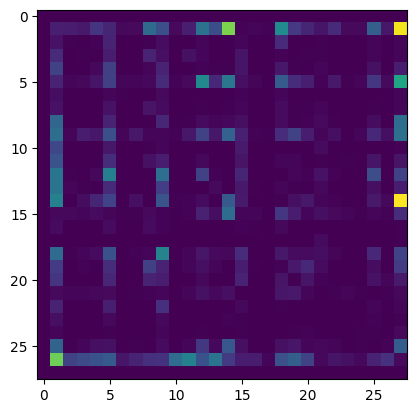

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [13]:
itos = {i:s for s, i in stoi.items()}

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

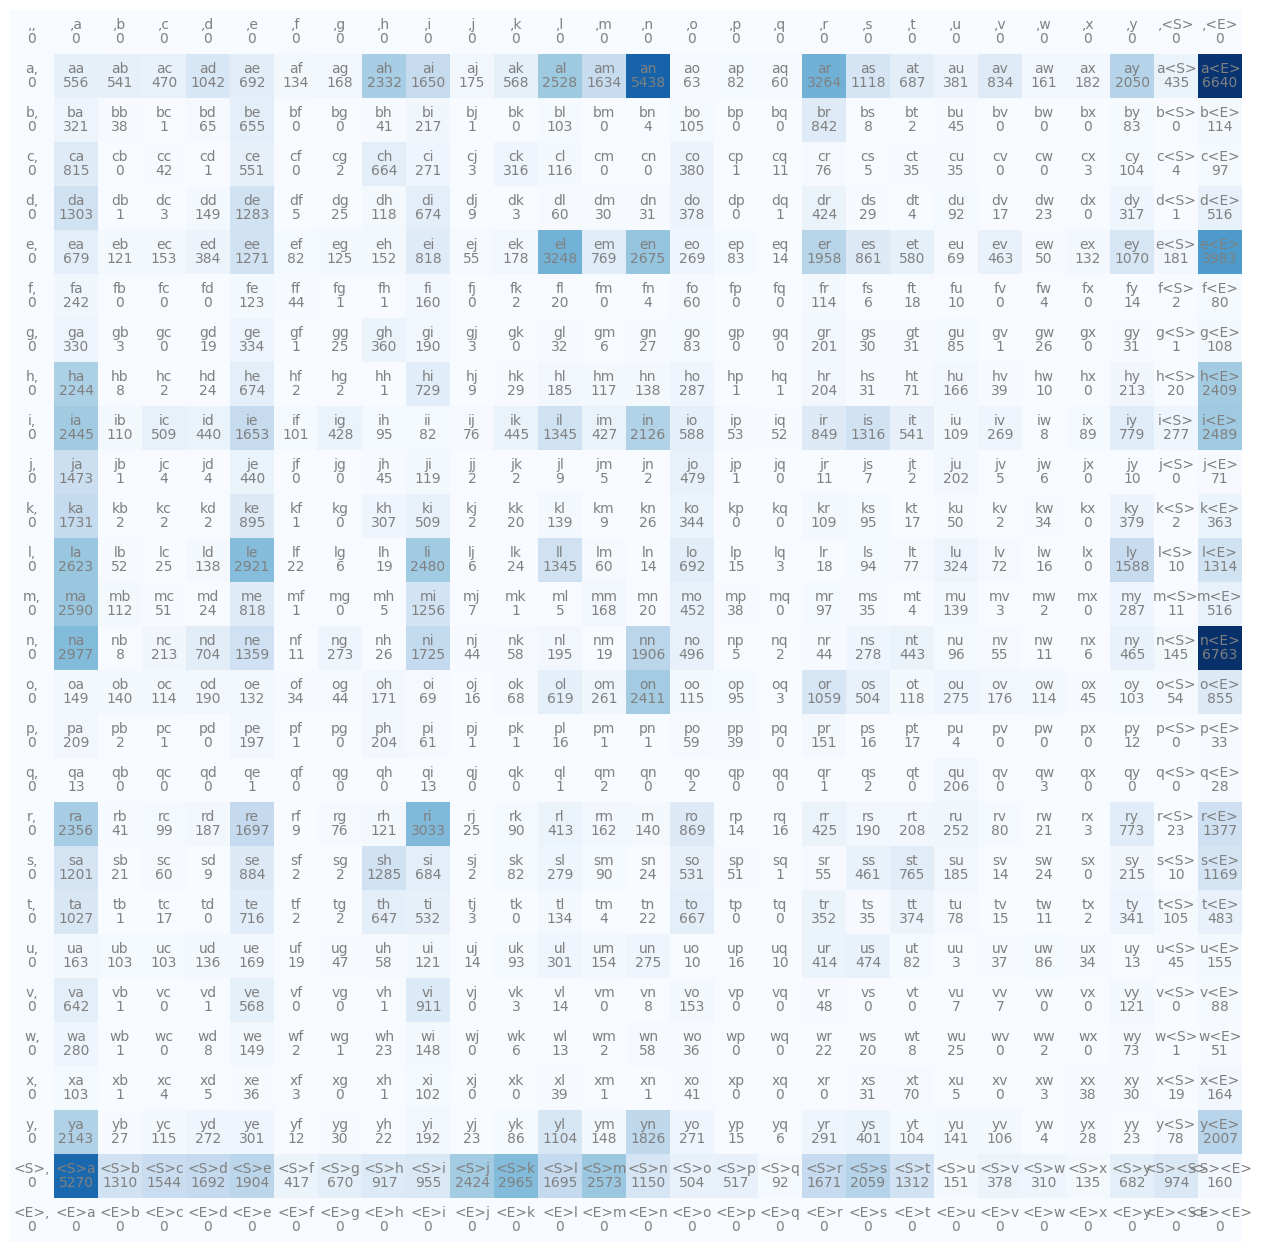

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos [j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color='gray')
plt.axis("off")

In [29]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
N = torch.zeros((27,27),dtype=torch.int32)

In [30]:
for w in words:
    w = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(w,w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

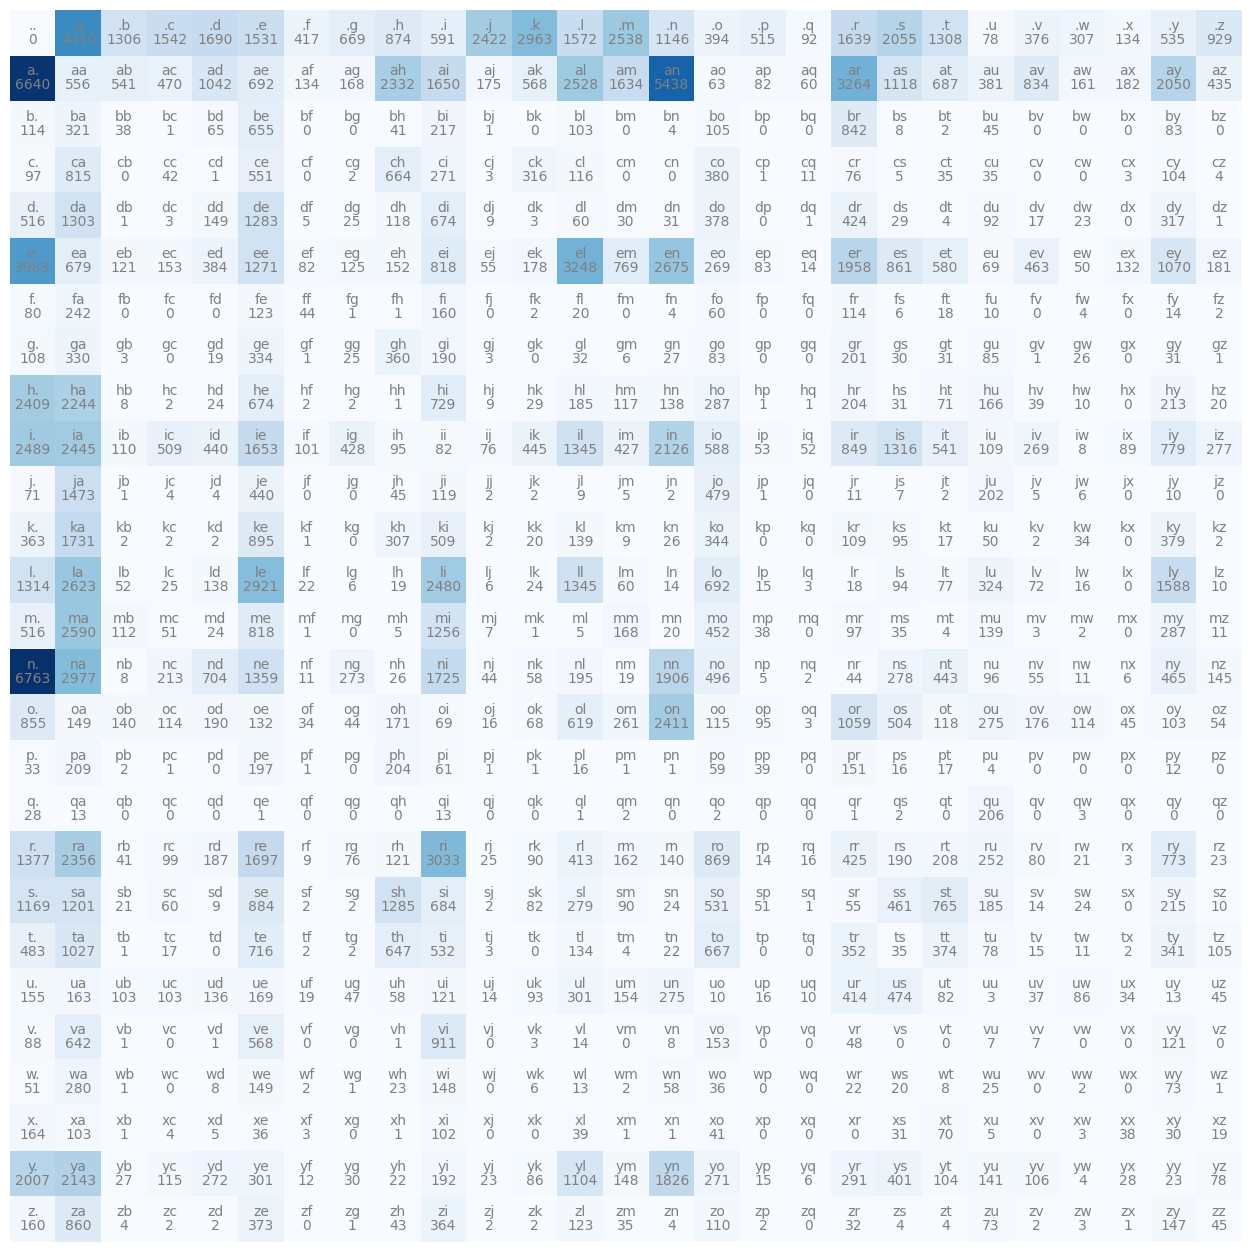

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos [j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color='gray')
plt.axis("off")

In [34]:
N[0,:].shape

torch.Size([27])

In [35]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [47]:
p = N[0].float()
p = p /p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [46]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [45]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 2, 0])

In [52]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [56]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [63]:
p.shape

torch.Size([27])

In [68]:
P.sum(1 , keepdim=True).shape

torch.Size([27, 1])

In [84]:
P = (N+1).float()# Model smoothing
P /= P.sum(1, keepdim=True)

In [85]:
P[0].sum()

tensor(1.)

In [86]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    ix=0
    out = []
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        # p = torch.ones(27) /27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [88]:
log_likelihood = 0.0
n=0
for w in ["sanjay"]:
    chs = ['.']+ list(w)+['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n +=1
        # print(f'{ch1},{ch2}: {prob:.4f} {logprob:.4f}')

print(log_likelihood)
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")

tensor(-17.5769)
nll=tensor(17.5769)
2.5109846591949463
